In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trader import Trader
from datamodel import OrderDepth, UserId, TradingState, Order, Listing, Trade
from backtester import get_tradehistory, get_mytrades, get_pnl, generate_tradingstate

In [7]:
products = ["STARFRUIT", "AMETHYSTS", "ORCHIDS", 
            "CHOCOLATE", "STRAWBERRIES", "ROSES", 
            "GIFT_BASKET", "COCONUT", "COCONUT_COUPON"]

POS_LIM = {"STARFRUIT": 20,
           "AMETHYSTS": 20,
           "ORCHIDS": 100,
           "CHOCOLATE": 250,
           "STRAWBERRIES": 350,
           "ROSES": 60,
           "GIFT_BASKET": 60,
           "COCONUT": 300,
           "COCONUT_COUPON": 600}

Process log file to extract price data

In [12]:
infile = r"data/trade9.log"

fp = open(infile)
start = False
start_signal = "Activities log"
end_signal = "Trade History"
outfile = "prices_day_5.txt"

with open(outfile, "w") as f:

    for line in fp:

        if not start:
            if start_signal in line:
                start = True

        elif start:
            if end_signal in line:
                break
            
            f.write(line)
             
f.close()
fp.close()


Check calculated PnL

In [8]:
price = pd.read_csv("data/prices_day_5.csv", sep=";")
infile = r"data/trade9.log"
hist = get_tradehistory(infile)
mytrades = get_mytrades(hist).reset_index(drop=True)
mp = price.loc[price["product"]=="AMETHYSTS"]

In [9]:
pnls = get_pnl(mytrades, mp["timestamp"], mp)
pnl_true = mp["profit_and_loss"]

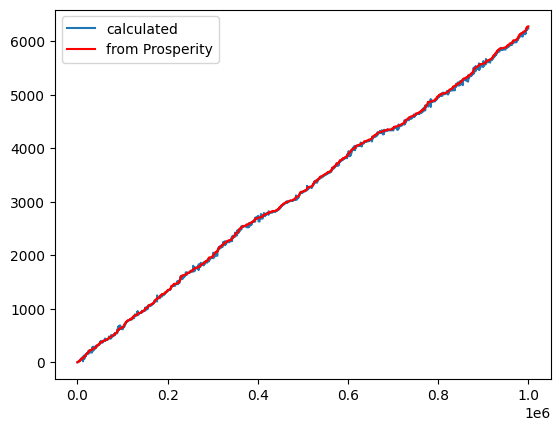

In [10]:
plt.plot(mp["timestamp"], pnls, label="calculated")
plt.plot(mp["timestamp"], pnl_true, color='r', label="from Prosperity")
plt.legend()
plt.show()

Exchange: example with 10 iterations

In [3]:
o1 = Order("AMETHYSTS", 10002, 6)
o1a = Order("AMETHYSTS", 10005, 2)
o1b = Order("AMETHYSTS", 10005, 3)
o2 = Order("AMETHYSTS", 10000, -3)
o2a = Order("AMETHYSTS", 9997, -5)
o2a = Order("AMETHYSTS", 9996, -1)
o3 = Order("ROSES", 10, -56)
o4 = Order("ROSES", 15, 6)

# a sample of "result" returned by Trader.run()
testres = {"AMETHYSTS": [o1, o1a, o1b, o2, o2a], "ROSES": [o3, o4]}


In [15]:
times = price["timestamp"].unique()
trader = Trader()

# initial condition
myorders = {}     
position_now = {p:0 for p in products}

# simulate for 10 timesteps
for time in times[:10]:
    price_current = price.loc[price["timestamp"]==time]
    st = generate_tradingstate(time, price_current, myorders, position_now)
    position_now = st.position
    myorders = trader.run(st)
